**ABOUT DATASET AND PROJECT** :

This dataset is ideal for training machine learning models aimed at understanding and predicting mental health conditions based on textual data. This dataset has records of Normal, Depression, Suicidal, Anxiety, Bipolar,Stress,Personality disorder mental categories. Using the records of Normal, Depression and Suicidal ,ML models for classification is build and used for prediction

**1.Importing necessary modules for NLP**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
import warnings
warnings.filterwarnings('ignore')

*Loading dataset*

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets-2024july/Projects/Combined Data.csv')
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [ ]:
df['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

*Seperating required records for ML model*

In [ ]:
df1=df.loc[df['status']=='Normal']
df2=df.loc[df['status']=='Depression']
df3=df.loc[df['status']=='Anxiety']
df4=df.loc[df['status']=='Stress']
df=pd.concat([df1,df2,df3,df4],axis=0,ignore_index=True)
df

,Unnamed: 0,statement,status
0,733,"Gr gr dreaming of ex crush to be my game, God",Normal
1,734,wkwkwk what a joke,Normal
2,735,Leaves are also standby in front of the PC ......,Normal
3,736,Thank God even though it's just a ride through,Normal
4,737,wedding teaser concept using the song day6 - o...,Normal
...,...,...,...
38307,49464,How to fight PCOS with diet and nutrition? PCO...,Stress
38308,49465,Do you ever feel like anxiety and depression a...,Stress
38309,49466,Is it normal to feel a gurgling in your chest ...,Stress
38310,49467,Lets lose the fears \n\nFear is a normal emot...,Stress


**2.Data Preprocessing and EDA**

*checking for null records*

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
statement,137
status,0


In [ ]:
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)
df.isnull().sum()

,0
Unnamed: 0,0
statement,0
status,0


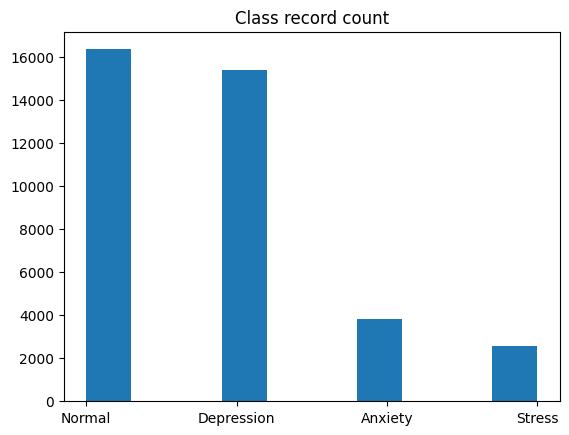

In [ ]:
plt.title('Class record count')
plt.hist(df['status'])
plt.show()

In [ ]:
df['status'].value_counts()

,count
status,
Normal,16343
Depression,15404
Anxiety,3841
Stress,2587


*Seperating text data and preprocessing it for model building*

In [ ]:
txt=df.iloc[:,1]
txt.head()

,statement
0,"Gr gr dreaming of ex crush to be my game, God"
1,wkwkwk what a joke
2,Leaves are also standby in front of the PC ......
3,Thank God even though it's just a ride through
4,wedding teaser concept using the song day6 - o...


*Removing special characters*

In [ ]:
txt=txt.str.replace('[^a-zA-Z0-9 ]','',regex=True)
txt

,statement
0,Gr gr dreaming of ex crush to be my game God
1,wkwkwk what a joke
2,Leaves are also standby in front of the PC be...
3,Thank God even though its just a ride through
4,wedding teaser concept using the song day6 on...
...,...
38170,How to fight PCOS with diet and nutrition PCOS...
38171,Do you ever feel like anxiety and depression a...
38172,Is it normal to feel a gurgling in your chest ...
38173,Lets lose the fears Fear is a normal emotion ...


*Removing stopwords from text and converting text to lowercase*

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
sw=stopwords.words('english')
txt=txt.apply(lambda line:' '.join([word.lower() for word in nltk.word_tokenize(line) if word.lower() not in sw]))
txt.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,statement
0,gr gr dreaming ex crush game god
1,wkwkwk joke
2,leaves also standby front pc office longer leave
3,thank god even though ride
4,wedding teaser concept using song day6 sounds ...


*Converting each words to its root word using lemmatization*

In [ ]:
nltk.download('wordnet')
lemma=WordNetLemmatizer()
txt=txt.apply(lambda line: ' '.join([lemma.lemmatize(word,pos='v') for word in nltk.word_tokenize(line)]))

[nltk_data] Downloading package wordnet to /root/nltk_data...


*Initialising input and output variable*

*Converting text to vectors using TF-IDF Vectorizer*

In [ ]:
vector=TfidfVectorizer()
X=vector.fit_transform(txt)
X

<38175x58022 sparse matrix of type '<class 'numpy.float64'>'
	with 1316347 stored elements in Compressed Sparse Row format>

In [ ]:
y=df['status'].map({'Anxiety':0,'Depression':1,'Stress':2,'Normal':3})

*Handling class imabalance*

In [ ]:
us=RandomUnderSampler()
X,y=us.fit_resample(X,y)

In [ ]:
y.value_counts()

,count
status,
0,2587
1,2587
2,2587
3,2587


*Splitting data for training and testing*

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((7243, 58022), (7243,), (3105, 58022), (3105,))

**3. Building models**

In [ ]:
nb=MultinomialNB()
dtc=DecisionTreeClassifier()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
ada=AdaBoostClassifier()
xgb=XGBClassifier()

In [ ]:
models=[nb,dtc,rf,ada,gb,xgb]
for model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print('-----',model,'-----')
  print(classification_report(y_test,y_pred))

----- MultinomialNB() -----
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       786
           1       0.56      0.94      0.70       774
           2       0.71      0.65      0.68       796
           3       0.98      0.23      0.38       749

    accuracy                           0.66      3105
   macro avg       0.74      0.66      0.63      3105
weighted avg       0.74      0.66      0.63      3105

----- DecisionTreeClassifier() -----
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       786
           1       0.75      0.72      0.74       774
           2       0.64      0.62      0.63       796
           3       0.80      0.85      0.82       749

    accuracy                           0.73      3105
   macro avg       0.73      0.73      0.73      3105
weighted avg       0.72      0.73      0.72      3105

----- RandomForestClassifier() -----
              precision    r

**4. Hyper Parameter Tuning**

In [ ]:
params = {
    'booster':['gbtree','gblinear'],
    'max_depth':[5,6,7],
    'n_estimators':[100,125,150]
}

In [ ]:
clf=RandomizedSearchCV(xgb,params,cv=4,scoring='accuracy')
clf.fit(x_train,y_train)

RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softprob', ...),
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'max_depth': [5, 6, 7],
                                        'n_estimators': [100, 125, 150]},
                   scoring='accuracy')

In [ ]:
pred=clf.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       786
           1       0.87      0.87      0.87       774
           2       0.80      0.79      0.80       796
           3       0.88      0.90      0.89       749

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



*Testing with new input*

In [ ]:
import re
new_input='im scared.. i dont know what to do...i need help'
text=re.sub('[^a-zA-Z0-9 ]','',new_input)
txt = ' '.join([word.lower() for word in nltk.word_tokenize(text) if word.lower() not in sw])
txt = ' '.join([lemma.lemmatize(word, pos='v') for word in nltk.word_tokenize(txt)])
pred=clf.predict(vector.transform([txt]))
if pred:
    prediction=model.predict(vector.transform([txt]))
    if prediction==0:
        print('#Anxious')
    elif prediction==1:
        print('#Depressed')
    elif prediction==2:
        print('#Stressed')
    else:
        print('#Normal')

#Stressed


**Saving model for GUI**

In [ ]:
import pickle
pickle.dump(clf,open('MHP.sav','wb'))
pickle.dump(vector,open('Vector.sav','wb'))